<center><img src='Images/plane.jpg'><center/>

# Instructional Airplane Leasing Program

## Overview

This dataset details every accident investigated by the National Transportation Safety Board over the last 40 years.  This data details the make, models, weather conditions, flight phases, injuries, and deaths during each accident.  The data could potentially help organizations find correlations, and identify conditions of an airplane flight that make it safer.  

Key findings:
1. **Cessna** and **Piper** airplanes appear to offer better protection to its passengers during airplane accidents.
2. Accidents that occur during **taxi**, **takeoff**, and **landing** have the **lowest** fatalities rates.  Accidents that occur during **maneuvers** and **cruise** phases have the **highest** fatality rates. 
3. Flights occurring during the **summer** months tend to have **lower** fatality rates that flights occuring during the **winter** months.

## Business Problem

In order to choose safe airplanes for the flight school, we will investigate these business questions:
1. How does the make of the aircraft affect airplane safety?
2. How does the phase of flight affect the survivability of airplane accidents?
3. How do the time of year and weather conditions affect the survival rate an airplane accident? 

To measure airplane safety, we will consider the protection offered by the airplane during an accident.  We will look at this three different ways
- **Survive:** The fraction of accidents with no fatalities.  
- **Survival Rate:** The fraction of passengers killed during an accident
- **Injury Rate:** The fraction of passengers uninjured during an accident. 

## Data Understanding

## Intake Data 

In this analysis we read in the entire AviationData dataset.  For each record, we use the following data:
- Event Date
- Make of Airplane
- Accidents injured, killed, minor injuries, and uninjured passengers in each accident
- Phase of Flight and weather conditions

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("paper")

import scr.data_preparation as dp
import scr.data_visualizations as dv 

df = pd.read_csv("Data/AviationDataClean.csv", dtype={"Latitude":object, "Longitude":object, 
                                                      "Report.Status":object,"Broad.phase.of.flight":object})

/var/folders/ym/68nrz1n97wj0gz5413bhpqs80000gn/T/ipykernel_15960/1870390053.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/AviationDataClean.csv", dtype={"Latitude":object, "Longitude":object,


In [2]:
df = df.dropna(subset="Model")
df["Make_Model"] = df[["Make","Model"]].apply(lambda x: "-".join(x), axis=1)

## Outcome Data

## Analysis

### Airplane Safety by Make of Aircraft

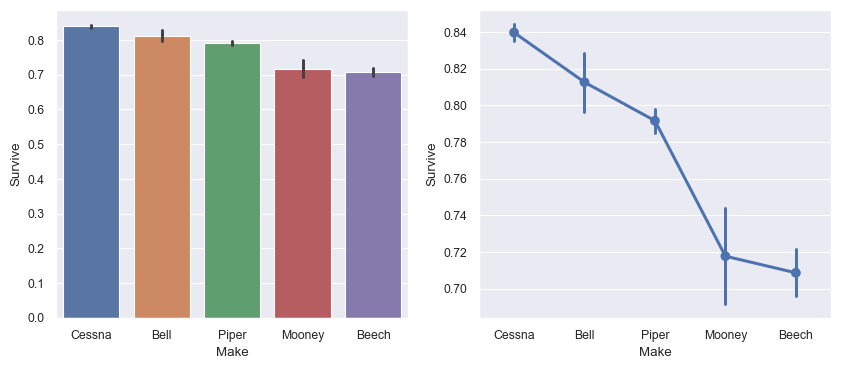

In [3]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(data=df, x='Make', y = 'Survive', ax = ax[0], order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index)
sns.pointplot(data=df, x='Make', y = 'Survive', order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index, ax = ax[1])

fig.savefig("Images/SurviveMake")

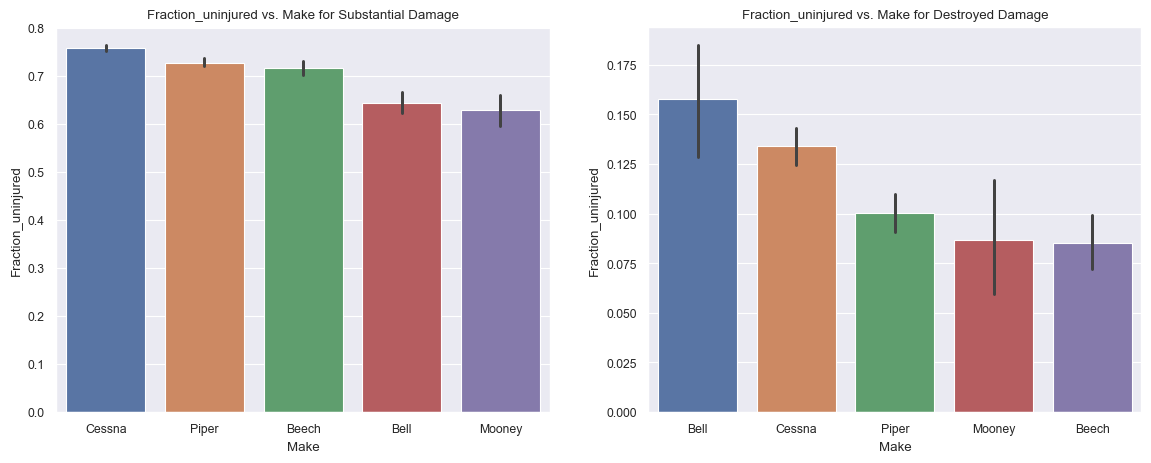

In [4]:
dv.performance_make_damage(df, "Fraction_uninjured")

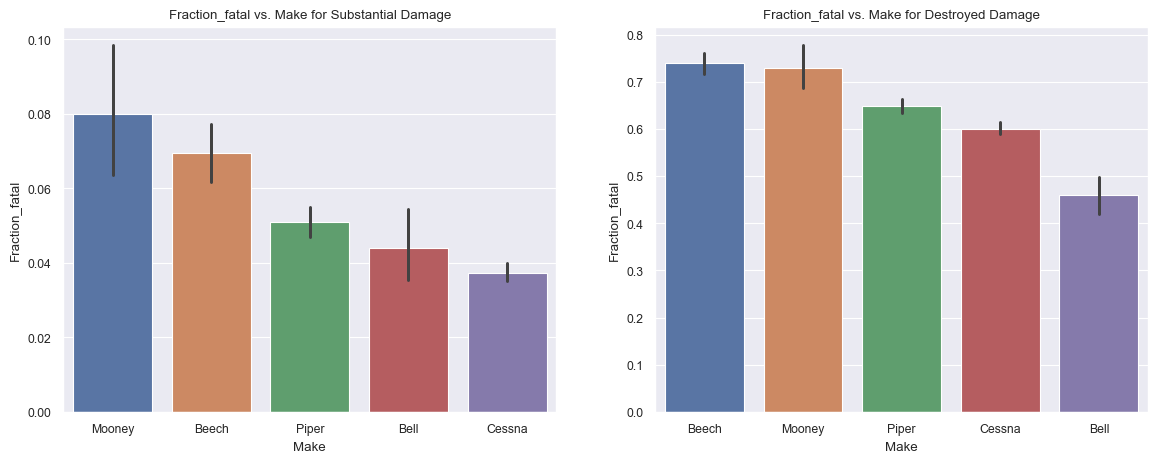

In [5]:
dv.performance_make_damage(df, "Fraction_fatal")

### Model Safety

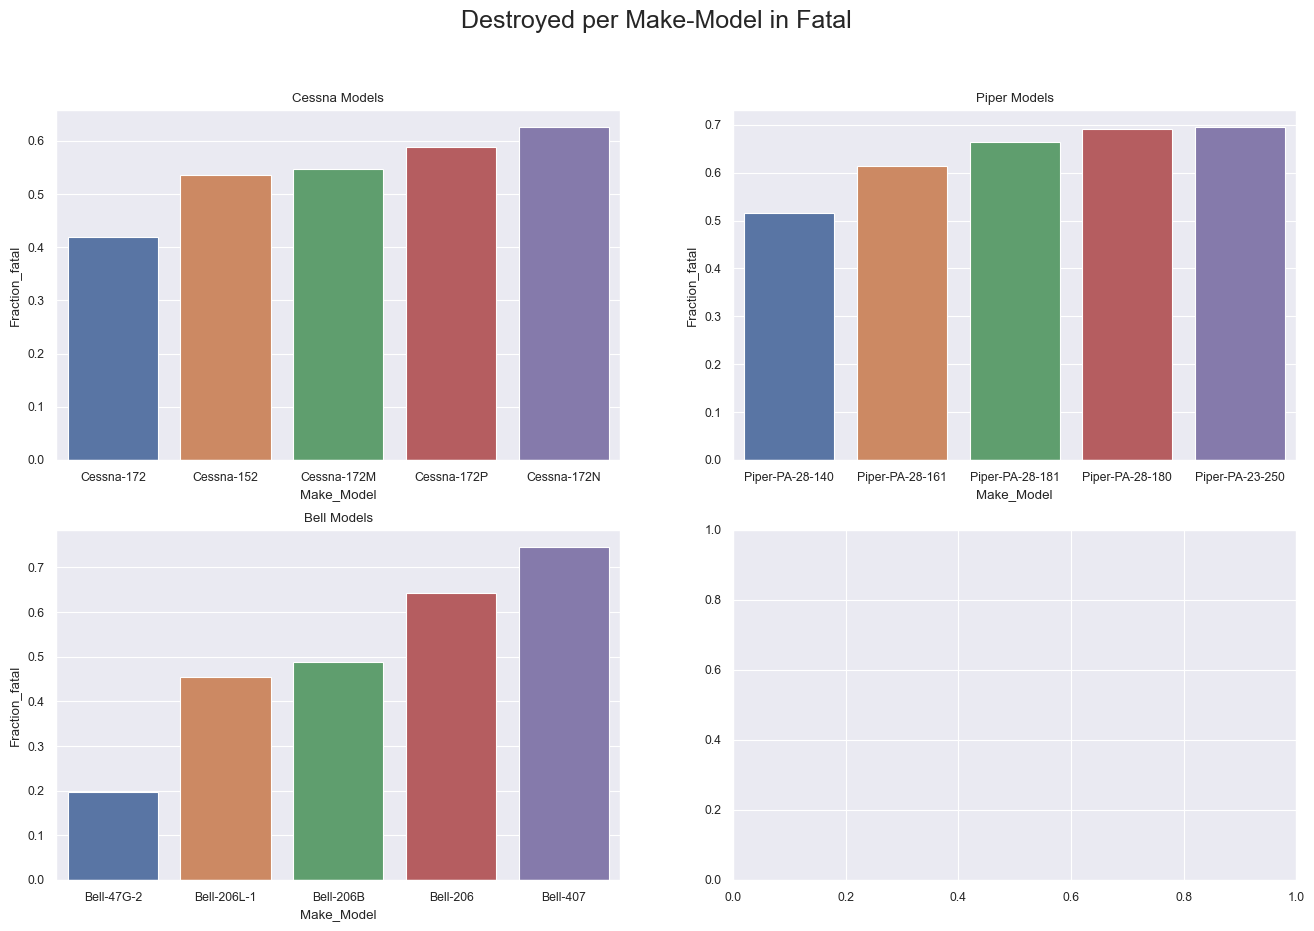

In [6]:
dfD = df[df['Aircraft.damage'] == 'Destroyed']
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Destroyed per Make-Model in Fatal', fontsize = 18)

dv.hi(dfD, 'Cessna', 'Fraction_fatal', ax[0][0])
dv.hi(dfD, 'Piper', 'Fraction_fatal', ax[0][1])
dv.hi(dfD, 'Bell', 'Fraction_fatal', ax[1][0])

fig.savefig("Images/ModelDestroyedFatal")

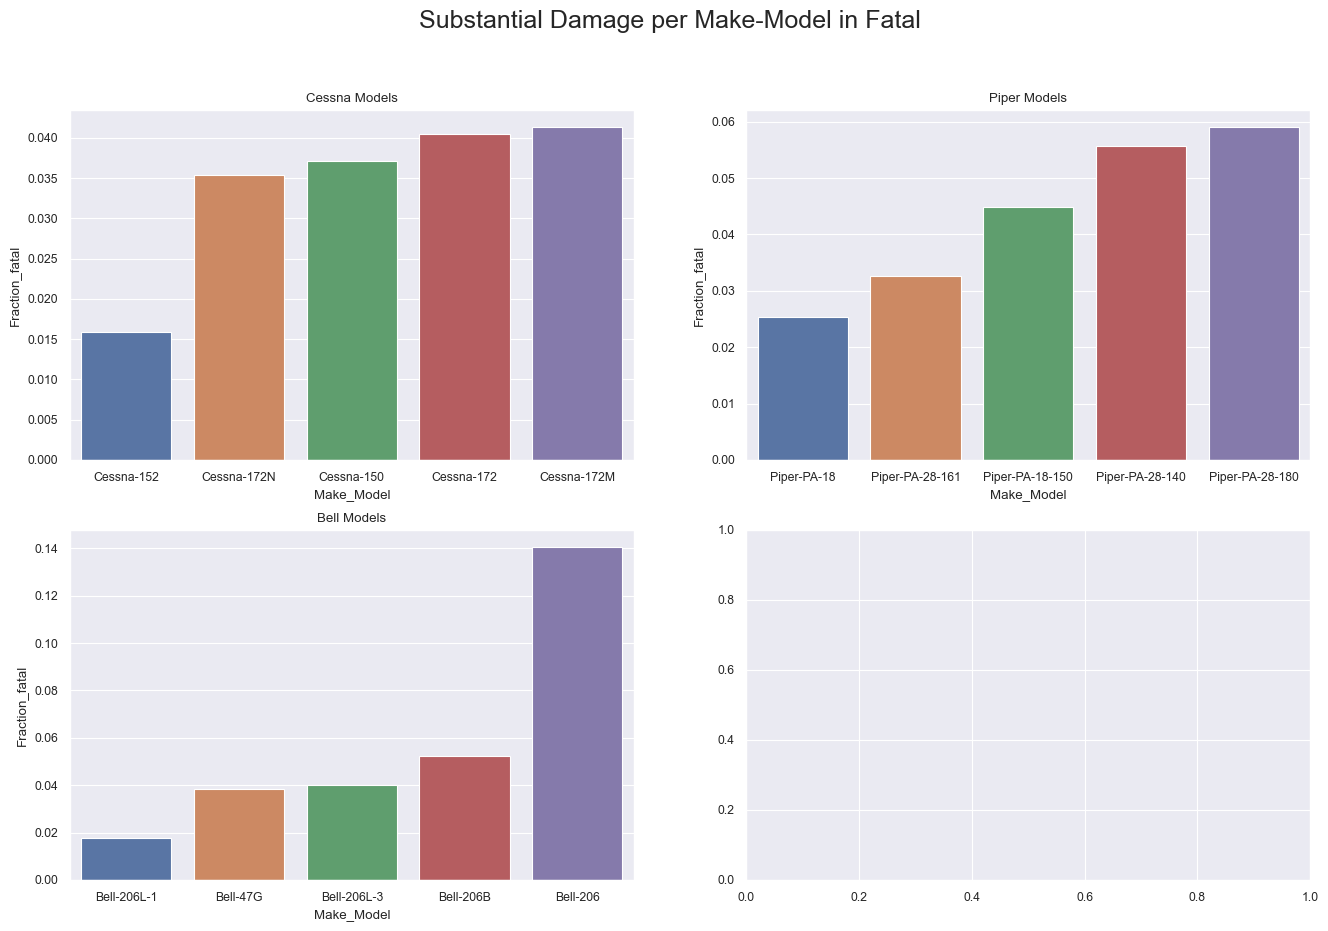

In [7]:
dfD = df[df['Aircraft.damage'] == 'Substantial']
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Substantial Damage per Make-Model in Fatal', fontsize = 18)

dv.hi(dfD, 'Cessna', 'Fraction_fatal', ax[0][0])
dv.hi(dfD, 'Piper', 'Fraction_fatal', ax[0][1])
dv.hi(dfD, 'Bell', 'Fraction_fatal', ax[1][0])

fig.savefig("Images/ModelSubstantialFatal")

/Users/jgoett/Library/CloudStorage/OneDrive-Personal/Documents/Fall2024/Flatiron-Live/Phase1/Project/Phase1-Airplane-Zach-Jeff/scr/data_visualizations.py:58: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xy = pd.DataFrame([(x,float(ave_frac.loc[x])) for x in top_5]).sort_values(by=1)


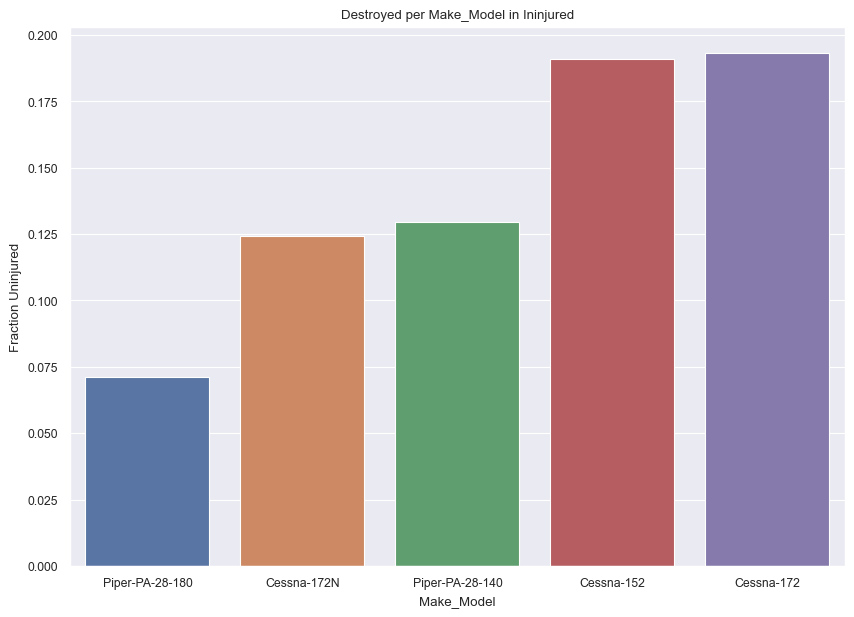

In [8]:
dv.best_models(df)

### Airplane Safety during Phases of Flight

In [16]:
df["Broad.phase.of.flight"].value_counts().drop(["Unknown","Other"]).index

Index(['Landing', 'Takeoff', 'Cruise', 'Approach', 'Maneuvering', 'Climb',
       'Taxi', 'Descent', 'Go-around', 'Standing', 'Other'],
      dtype='object', name='Broad.phase.of.flight')

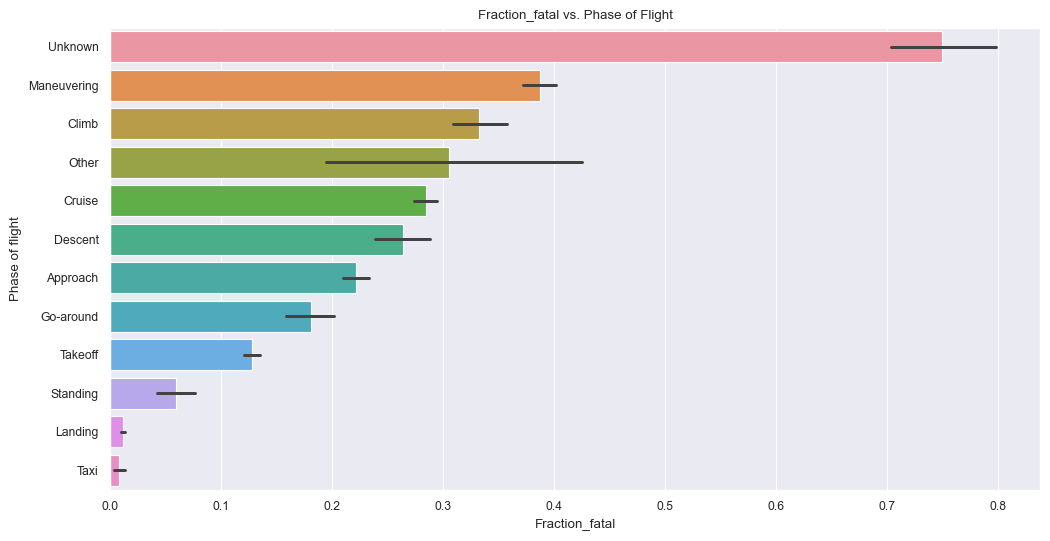

In [9]:
dv.performance_phase(df, "Fraction_fatal")

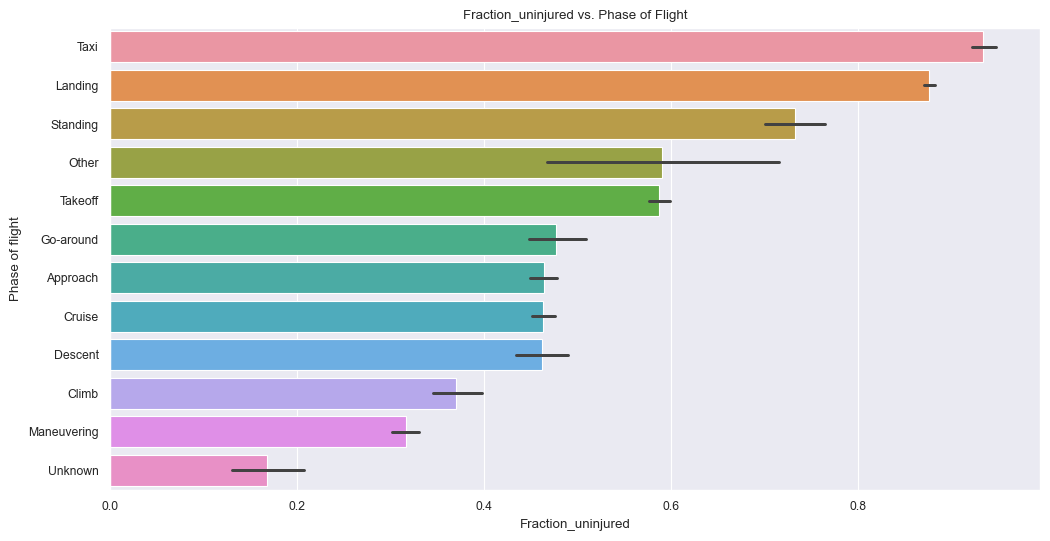

In [10]:
dv.performance_phase(df, "Fraction_uninjured")

Calculating Heatmap

In [11]:
phases_flight = df["Broad.phase.of.flight"].value_counts().index[:-2]
df_phases = df[df["Broad.phase.of.flight"].map(lambda x: x in phases_flight)]

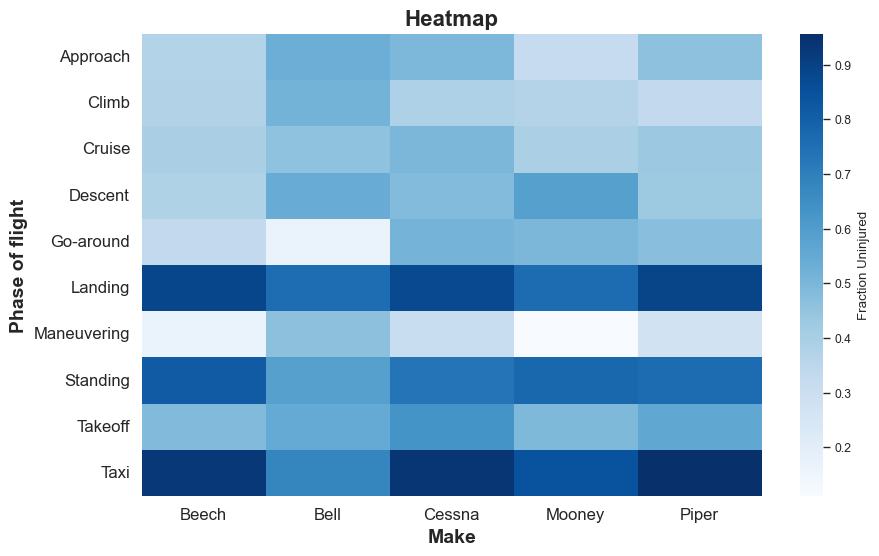

In [12]:
fig, ax = plt.subplots(figsize=(10,6))


table = pd.pivot_table(df_phases, index=['Make'],columns=['Broad.phase.of.flight'], values='Fraction_uninjured').T
sns.heatmap(table, cmap="Blues", cbar_kws={"label":"Fraction Uninjured"}, ax=ax)
ax.set_title('Heatmap', fontsize=16, fontweight = 'bold')
ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/Uninjured_Make_Phases", bbox_inches = 'tight')

### Airplane Safety during Different Months of the Year

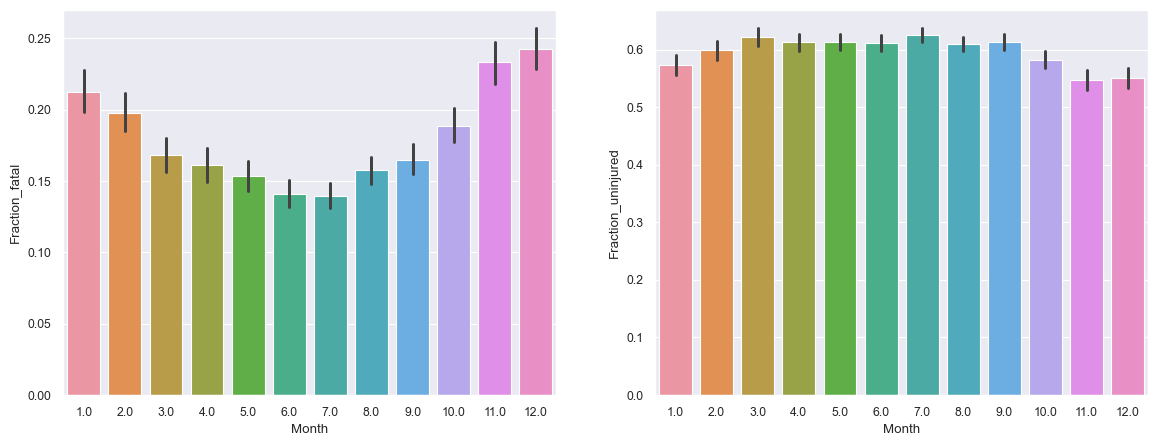

In [13]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

sns.barplot(data=df, x='Month', y = 'Fraction_fatal', ax=ax[0])
sns.barplot(data=df, x='Month', y = 'Fraction_uninjured', ax=ax[1])

fig.savefig("Images/Survival_month")

## Conclusions

* Consider __Cessna__ or __Piper__ makes (Cessna 172, 158, or Piper PA-28)
* Focus on safety during __climb__, __cruize__, and __maneuvering__ phases of flight
* Focus on safety during __winter__ flying.

## Next Steps

* Investigate the geopraphical locations of accidents to gain insight.
* Investigate weather conditions.